<a href="https://colab.research.google.com/github/VictoriaOAbel/Codveda/blob/main/Task_1_Predictive_Modeling_(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

url = "https://raw.githubusercontent.com/miirshe/USA-Housing-Analysis-and-Prediction-Price/main/USA_Housing.csv"
USAhousing = pd.read_csv(url)

print(USAhousing.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09      23086.80050  1.059034e+06   
1                          3.09      40173.07217  1.505891e+06   
2                          5.13      36882.15940  1.058988e+06   
3                          3.26      34310.24283  1.260617e+06   
4                          4.23      26354.10947  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

In [ ]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [ ]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [ ]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price'] #Target variable what we are trying to predict

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
# Here we instance by creating an instance of the linear regression model basically creating a linear regression object

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Print the intercept
print(lm.intercept_)

-2640159.796813771


In [ ]:
lm.coef_    #Coefficients for each feature

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [ ]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [ ]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
#create a data frame lm.coef is the data x.columns is the index
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678023
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [ ]:
predictions = lm.predict(X_test)
#this takes just 1 feature X
# X_test is a feature the model has not seen before

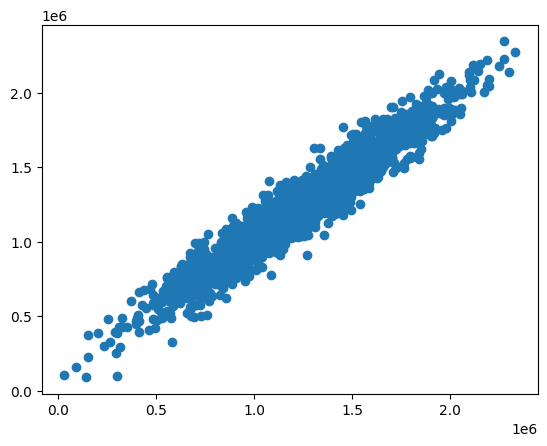

In [ ]:
plt.scatter(y_test, predictions)

/tmp/ipython-input-5727784.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions), bins=50)


<Axes: xlabel='Price', ylabel='Density'>

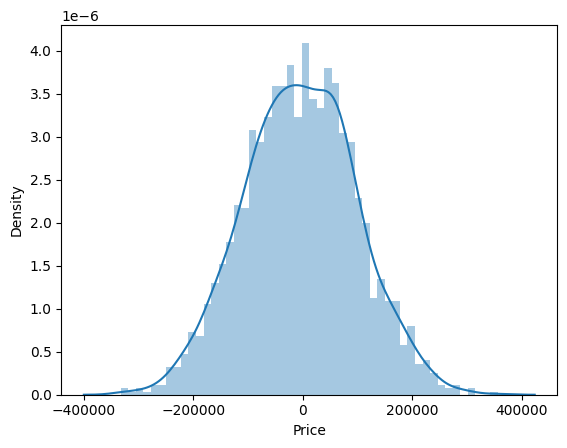

In [ ]:
sns.distplot((y_test-predictions), bins=50)

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_lm = mean_squared_error(y_test, predictions)
r2_lm = r2_score(y_test, predictions)

In [ ]:
print("Linear Regression MSE:", mse_lm)
print("Linear Regression R²:", r2_lm)

Linear Regression MSE: 10460958905.774702
Linear Regression R²: 0.9176824009781859


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.2225072179
MSE: 10460958905.774702
RMSE: 102278.82921589738


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.9178179926278648

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor(
    max_depth=5,
    random_state=42
)

In [ ]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [ ]:
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R²:", r2_dt)

Decision Tree MSE: 42896016552.36985
Decision Tree R²: 0.6624499606587853


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

In [ ]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)

Random Forest MSE: 16032917763.600739
Random Forest R²: 0.8738364897996828


Compare Model Performance

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [mse_lm, mse_dt, mse_rf],
    "R²": [r2_lm, r2_dt, r2_rf]
})

In [ ]:
results

,Model,MSE,R²
0,Linear Regression,1.046096e+10,0.917682
1,Decision Tree,4.289602e+10,0.662450
2,Random Forest,1.603292e+10,0.873836


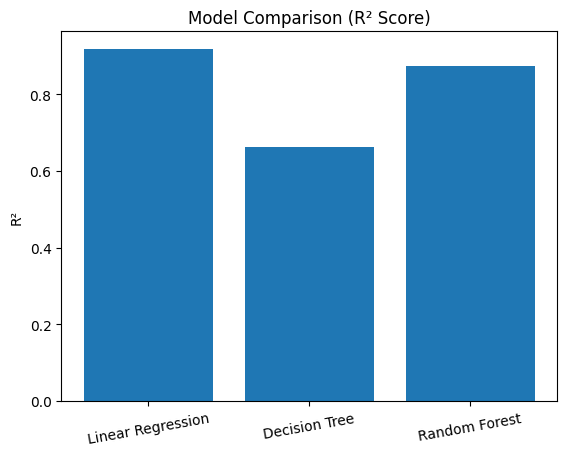

In [ ]:
import matplotlib.pyplot as plt

plt.bar(results["Model"], results["R²"])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R²")
plt.xticks(rotation=10)
plt.show()